# Data Mining Project

**Authors:**
<br>Yogev Matalon
<br>Tomer Yanay
<br>Noam Tor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use("ggplot")
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv("train.csv")
df.head(5)

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,target
0,0,0,0,0,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,0,0,0,0,0,Class_6
2,0,0,0,0,1,0,0,6,5,0,Class_6
3,0,0,0,0,6,0,0,0,0,0,Class_3
4,0,0,0,0,2,0,0,0,0,0,Class_3


### Find the most common classes and filter the dataset

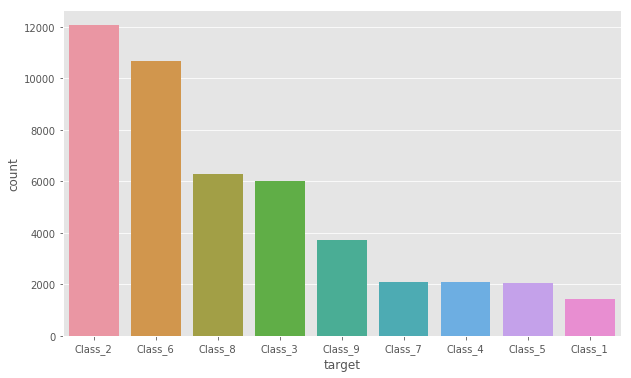

In [3]:
plt.figure(num=None, figsize=(10, 6), facecolor='w', edgecolor='k')
h = sns.countplot(x="target", data=df, order = df['target'].value_counts().index)

We can see that the most commun classes are number 2 and 6. We will use these classes for our project, and remove all other rows with other classes.

In [4]:
old_row_num = df.shape[0]
df = df[(df['target'] == 'Class_6') | (df['target'] == 'Class_2')]  # Select Features 2 and 6 only.
df.head(5)
row_num = df.shape[0]
print old_row_num - row_num, "rows were removed.\nNow we have ", str(df.shape[0]) ," rows in our data."

23689 rows were removed.
Now we have  22719  rows in our data.


## Explore the features
### Description and Box Plot

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22719 entries, 0 to 46406
Data columns (total 11 columns):
feat_56    22719 non-null int64
feat_7     22719 non-null int64
feat_69    22719 non-null int64
feat_12    22719 non-null int64
feat_70    22719 non-null int64
feat_51    22719 non-null int64
feat_20    22719 non-null int64
feat_21    22719 non-null int64
feat_61    22719 non-null int64
feat_23    22719 non-null int64
target     22719 non-null object
dtypes: int64(10), object(1)
memory usage: 2.1+ MB


All features are non-null, int64 dtype.

In [6]:
df.describe()  # Ge thte mathematical description of the data

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23
count,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000
mean,0.177209,0.064704,0.116158,0.129143,0.678903,0.058629,0.229367,0.306087,0.455258,0.079801
std,0.850590,0.336531,0.594397,0.446203,1.562736,0.585949,0.714869,0.857623,1.377320,0.466895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42.000000,9.000000,21.000000,12.000000,32.000000,44.000000,13.000000,13.000000,33.000000,15.000000


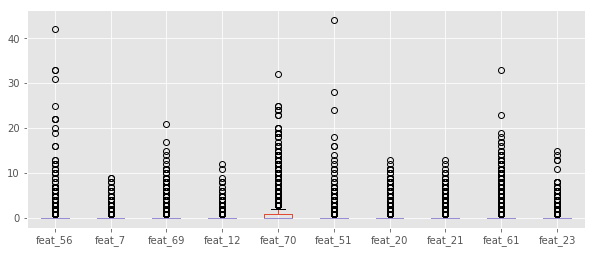

In [7]:
plt.figure(figsize=(10, 4))
df.boxplot()

We can see that in most features, most of our data is 0. The Box Plots have no size, and "stuck" at 0, and the data which is not zero is marked as outliers.

### Distribution of each feature within the classes

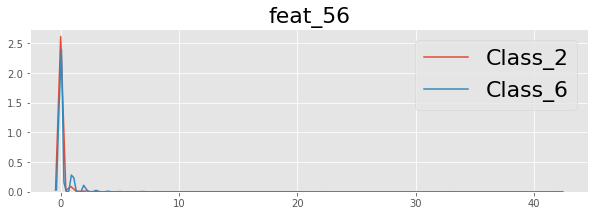

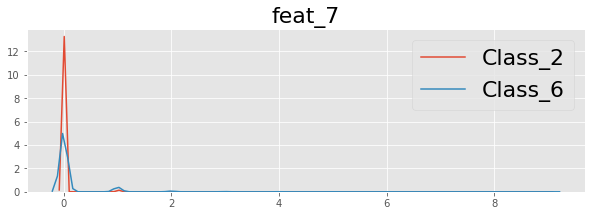

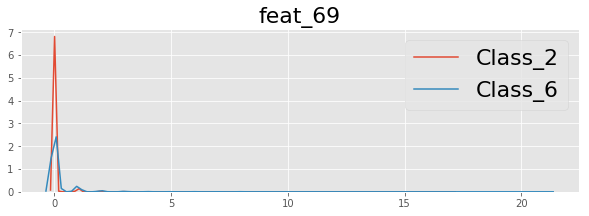

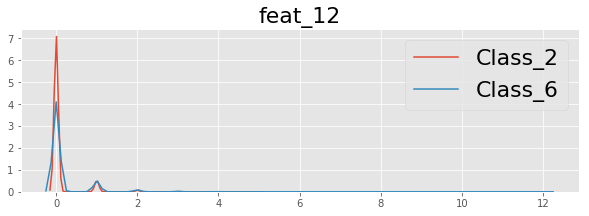

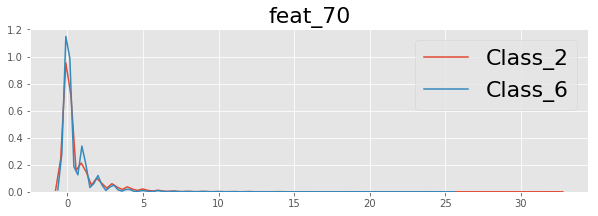

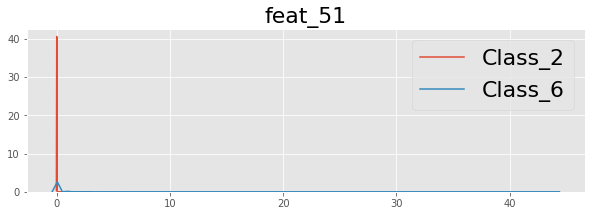

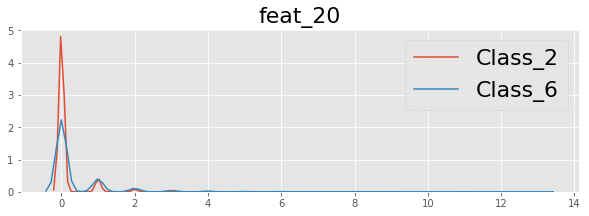

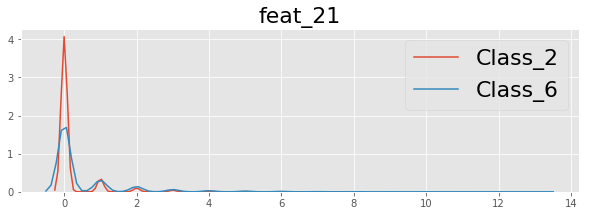

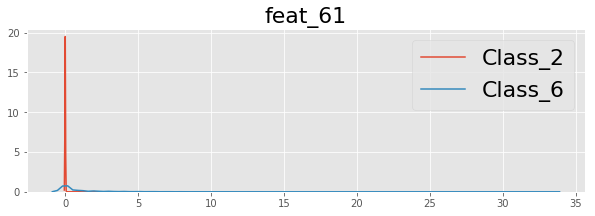

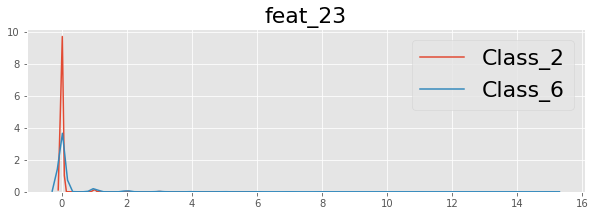

In [8]:
for col in df.columns[:-1]:
    plt.figure(figsize=(10,3))
    sns.kdeplot(df.loc[df.target=='Class_2', col], label='Class_2')  # KDE of class 2
    sns.kdeplot(df.loc[df.target=='Class_6', col], label='Class_6')  # KDE of class 6
    plt.legend(fontsize=22)
    plt.title(col, fontsize=22);

### Understand the sparse of each feature

Non zeros percent in each feture:


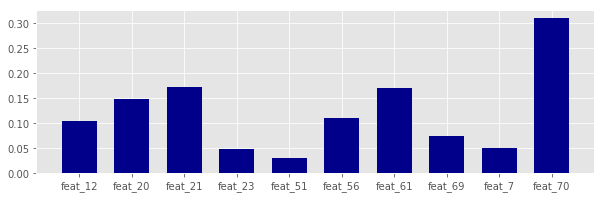

feat_56    0.110304
feat_7     0.050574
feat_69    0.073155
feat_12    0.103350
feat_70    0.311413
feat_51    0.030327
feat_20    0.148818
feat_21    0.171530
feat_61    0.169990
feat_23    0.047889
dtype: float64


In [10]:
print "Non zeros percent in each feture:"
y = ((df[:-1] !=0).sum() / row_num)[:-1]
x = df.columns[:-1]
plt.figure(figsize=(10,3))
width = 1/1.5
plt.bar(x, y, width, color="darkblue")
plt.show()
print y

We can see that the data is **very sparse**, places withot zero are very important, and we will build new features based on this insight.

In [ ]:
#המחשבה שלי פה זה ליצור גרף שמראה כמה לא אפסים יש בכל פיצ'ר ביחס לכמות הרשומות בכל קלאס, עוד לא סיימתי עם זה
#צריך גם להוסיף עמודה של כמה אפסים יש בכל רשומה, מסתמן שזה פיצ'ר חשוב פה
print "now with respect to target:"
for col in df.columns[:-1]:
    bar_1 = ((df[(df[col] != 0) & (df['target']=='Class_2')]).shape[0]) / float(df[df['target'] == "Class_2"].shape[0])
    bar_2 = (df[(df[col] != 0) & (df['target']=='Class_6')]).shape[0] / float(df[df['target'] == "Class_6"].shape[0])
    pd.DataFrame(np.array([bar_1,bar_2])).plot.bar
    plt.show()

### Understand the features correlation

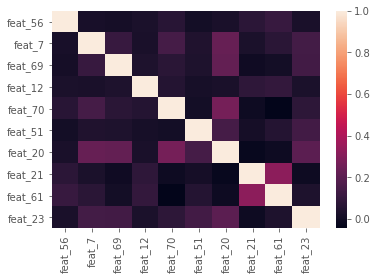

In [11]:
cor_mat = df.corr()
sns.heatmap(cor_mat)

We cannot see any significant correlation.

### PCA

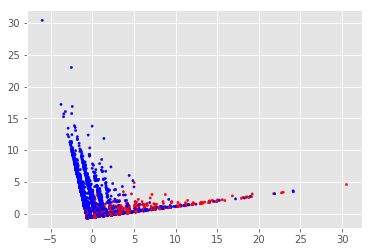

In [12]:
x = df.drop(['target'], axis=1)
y = df['target']=='Class_2'
pca = PCA(n_components=2)
pca.fit(x)
reduced_data_PCA = pca.transform(x)
plt.scatter(reduced_data_PCA[:, 0], reduced_data_PCA[:, 1], c=y, s=5, cmap = "bwr")
plt.show()

we can see that the PCA components are not very effective to seperate between the two classes.

### LDA

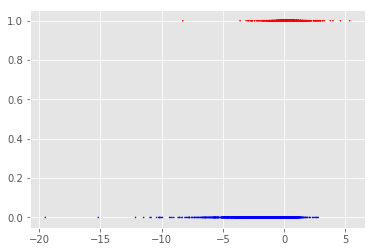

In [13]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(x, y)
reduced_data_LDA = LDA.transform(x)
plt.scatter(reduced_data_LDA[:, 0], y, c=y, s=1, cmap = "bwr")
plt.show()

# feture extraction

In [14]:
# insert the number of zeros for each row
df['zeros_number'] = (df == 0).astype(int).sum(axis=1)
df.head(5)

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,target,zeros_number
0,0,0,0,0,0,0,0,0,0,0,Class_2,10
1,1,0,0,0,0,0,0,0,0,0,Class_6,9
2,0,0,0,0,1,0,0,6,5,0,Class_6,7
5,0,0,0,0,0,0,0,0,0,0,Class_6,10
6,0,0,0,0,0,0,0,0,0,0,Class_2,10


In [15]:
# we have al lot of rows with 10 zeros (all the fetures are 0), let's check if we can remove them as outliars
print df[(df['zeros_number']==10) & (df['target']=='Class_2')].shape[0]
print df[(df['zeros_number']==10) & (df['target']=='Class_6')].shape[0]

6196
2385


In [17]:
def smart_multiplication(row): #new feature- multiplication of all the features, if value of feature is 0 than we multiple with 1 insted of 0
    temp = 1
    for i in row:
        if i != 0:
            temp = temp*i
    return temp
            

In [21]:
df['multi_feat'] = x.apply(smart_multiplication, axis=1) #add the new multi_feat to the df
df.head(5) #validation

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,target,zeros_number,multi_feat
0,0,0,0,0,0,0,0,0,0,0,Class_2,10,1
1,1,0,0,0,0,0,0,0,0,0,Class_6,9,1
2,0,0,0,0,1,0,0,6,5,0,Class_6,7,30
5,0,0,0,0,0,0,0,0,0,0,Class_6,10,1
6,0,0,0,0,0,0,0,0,0,0,Class_2,10,1


In [25]:
# new 10 fetures- binary_feat= 0 if the feature=0, 1 else
columns_names = x.columns # need here the original data, without the extra features or target
for col in columns_names:
    df['binary_' + col] = (df[col]!=0).astype(int)
df.head(5) #validation


,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,...,binary_feat_56,binary_feat_7,binary_feat_69,binary_feat_12,binary_feat_70,binary_feat_51,binary_feat_20,binary_feat_21,binary_feat_61,binary_feat_23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,6,5,0,...,0,0,0,0,1,0,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Naive bayes classifier

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
train, test = train_test_split(df, test_size=0.2)
train_x, test_x = train.drop(['target'], axis=1), test.drop(['target'], axis=1) 
train_y, test_y = train['target'], test['target']

clf = GaussianNB(priors = None)
clf.fit(train_x, train_y) #train the model on the train data
pred = clf.predict(test_x) # == test_y).sum() / float(test.shape[0]) #predict with the model on the test data and print the accuration
print "the total acurracy is " + str(((pred == test_y).sum() / float(test.shape[0])))

the total acurracy is 0.720950704225


In [52]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None): #code from github : https://gist.github.com/zachguo/10296432
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print "    " + empty_cell,
    for label in labels: 
        print "%{0}s".format(columnwidth) % label,
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print "    %{0}s".format(columnwidth) % label1,
        for j in range(len(labels)): 
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print cell,
        print

# first generate with specified labels
labels = ['Class_2', 'Class_6']
cm = confusion_matrix(test_y, pred, labels, sample_weight=None)

# then print it in a pretty way
print_cm(cm, labels)

            Class_2 Class_6
    Class_2  2210.0   169.0
    Class_6  1054.0  1111.0
